In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Milestones

In [3]:
milestones = pd.read_excel("MC_CodedCore_DI.xlsx")

In [4]:
milestones.head()

,PendD,ConfD,Discharged,ConfDtoDisch,Delays,DelayDetail,Hospital_Code,VisitNumber_Code,Room_Code,Bed_Code,Unit_Code
0,NaT,2017-10-20 11:25:00,2017-10-20 12:41:00,4603 seconds,0.0,NaN,5.0,72562,1041.0,5.0,79.0
1,2018-04-05 01:48:00,2018-04-05 05:56:00,2018-04-05 10:15:00,15535 seconds,1.0,Transportation-Private Vehicle-waiting on a pi...,6.0,80994,2188.0,5.0,118.0
2,2017-08-30 15:33:00,2017-09-01 10:58:00,2017-09-01 12:23:00,5055 seconds,0.0,NaN,2.0,11147,357.0,16.0,17.0
3,2018-03-24 06:20:00,2018-03-24 07:42:00,2018-03-24 13:56:00,22408 seconds,3.0,Procedure Related-Awaiting Test Results-voidin...,NaN,86784,NaN,NaN,NaN
4,2018-04-10 16:26:00,2018-04-11 12:47:00,2018-04-11 15:11:00,8595 seconds,0.0,NaN,2.0,81725,196.0,5.0,3.0


In [5]:
milestones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71411 entries, 0 to 71410
Data columns (total 11 columns):
PendD               39371 non-null datetime64[ns]
ConfD               64161 non-null datetime64[ns]
Discharged          71411 non-null datetime64[ns]
ConfDtoDisch        64161 non-null object
Delays              64161 non-null float64
DelayDetail         25965 non-null object
Hospital_Code       71410 non-null float64
VisitNumber_Code    71411 non-null int64
Room_Code           71410 non-null float64
Bed_Code            71410 non-null float64
Unit_Code           71410 non-null float64
dtypes: datetime64[ns](3), float64(5), int64(1), object(2)
memory usage: 6.0+ MB


In [6]:
#len(milestones[milestones['PendD'].isnull()])

In [7]:
print("Column".ljust(18),"Type".ljust(16),"Unique Values".ljust(15), "Non-null".ljust(9), "Null Values".ljust(11),"Non-null %")
for i in milestones.columns:
    print(i.ljust(18),str(milestones[i].dtype).ljust(16),str(milestones[i].nunique()).ljust(15),
          str(len(milestones[milestones[i].notnull()])).ljust(9), str(len(milestones[milestones[i].isnull()])).ljust(11), 
          round(len(milestones[milestones[i].notnull()])/len(milestones[i])*100,2))
    



Column             Type             Unique Values   Non-null  Null Values Non-null %
PendD              datetime64[ns]   23556           39371     32040       55.13
ConfD              datetime64[ns]   48298           64161     7250        89.85
Discharged         datetime64[ns]   53615           71411     0           100.0
ConfDtoDisch       object           25594           64161     7250        89.85
Delays             float64          7               64161     7250        89.85
DelayDetail        object           9061            25965     45446       36.36
Hospital_Code      float64          4               71410     1           100.0
VisitNumber_Code   int64            62036           71411     0           100.0
Room_Code          float64          634             71410     1           100.0
Bed_Code           float64          38              71410     1           100.0
Unit_Code          float64          51              71410     1           100.0


In [8]:
milestones['ConfDtoDischTime(sec)']= milestones['ConfDtoDisch'].str.replace(" seconds","").astype('float')
milestones['ConfDtoDisch(min)'] = milestones['ConfDtoDischTime(sec)']/60
milestones['ConfDtoDisch(min)'].fillna(0, inplace=True)

##### clean dataset with Hospital_Code non null

In [10]:
milestones = milestones.dropna(subset=['Hospital_Code'])
milestones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71410 entries, 0 to 71410
Data columns (total 13 columns):
PendD                    39370 non-null datetime64[ns]
ConfD                    64160 non-null datetime64[ns]
Discharged               71410 non-null datetime64[ns]
ConfDtoDisch             64160 non-null object
Delays                   64160 non-null float64
DelayDetail              25964 non-null object
Hospital_Code            71410 non-null float64
VisitNumber_Code         71410 non-null int64
Room_Code                71410 non-null float64
Bed_Code                 71410 non-null float64
Unit_Code                71410 non-null float64
ConfDtoDischTime(sec)    64160 non-null float64
ConfDtoDisch(min)        71410 non-null float64
dtypes: datetime64[ns](3), float64(7), int64(1), object(2)
memory usage: 7.6+ MB


In [11]:
columns_to_cat = ['Hospital_Code','Room_Code','Bed_Code','Unit_Code']
milestones[columns_to_cat] = milestones[columns_to_cat].astype('int').astype('str')

In [12]:
#milestones['Hospital_Code'].value_counts()

In [13]:
milestones["Hosp&Unit"] = milestones["Hospital_Code"].str.cat(milestones["Unit_Code"].astype(str), sep ="_")
milestones["Hosp&Unit&Room"] = milestones["Hosp&Unit"].str.cat(milestones["Room_Code"].astype(str), sep ="_")
milestones["Hosp&Unit&Room&Bed"] = milestones["Hosp&Unit&Room"].str.cat(milestones["Bed_Code"].astype(str), sep ="_")
#milestones.head()

In [20]:
milestones.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71410 entries, 0 to 71410
Data columns (total 16 columns):
PendD                    39370 non-null datetime64[ns]
ConfD                    64160 non-null datetime64[ns]
Discharged               71410 non-null datetime64[ns]
ConfDtoDisch             64160 non-null object
Delays                   64160 non-null float64
DelayDetail              25964 non-null object
Hospital_Code            71410 non-null object
VisitNumber_Code         71410 non-null int64
Room_Code                71410 non-null object
Bed_Code                 71410 non-null object
Unit_Code                71410 non-null object
ConfDtoDischTime(sec)    64160 non-null float64
ConfDtoDisch(min)        71410 non-null float64
Hosp&Unit                71410 non-null object
Hosp&Unit&Room           71410 non-null object
Hosp&Unit&Room&Bed       71410 non-null object
dtypes: datetime64[ns](3), float64(3), int64(1), object(9)
memory usage: 11.8+ MB


#####  For analysis of distribution of visitors, I removed  duplicate records per VisitNumber_code.  The duplicacy was only when there were multiple reasons for delays.

In [25]:
milestones_deduped = milestones.drop_duplicates(subset="VisitNumber_Code")

In [26]:
milestones_deduped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62036 entries, 0 to 71410
Data columns (total 16 columns):
PendD                    33494 non-null datetime64[ns]
ConfD                    54927 non-null datetime64[ns]
Discharged               62036 non-null datetime64[ns]
ConfDtoDisch             54927 non-null object
Delays                   54927 non-null float64
DelayDetail              16619 non-null object
Hospital_Code            62036 non-null object
VisitNumber_Code         62036 non-null int64
Room_Code                62036 non-null object
Bed_Code                 62036 non-null object
Unit_Code                62036 non-null object
ConfDtoDischTime(sec)    54927 non-null float64
ConfDtoDisch(min)        62036 non-null float64
Hosp&Unit                62036 non-null object
Hosp&Unit&Room           62036 non-null object
Hosp&Unit&Room&Bed       62036 non-null object
dtypes: datetime64[ns](3), float64(3), int64(1), object(9)
memory usage: 8.0+ MB


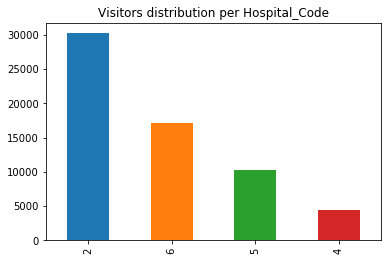

In [27]:
milestones_deduped["Hospital_Code"].value_counts().plot(kind="bar")
plt.title("Visitors distribution per Hospital_Code")

#### 2 has most number of records in the dataset

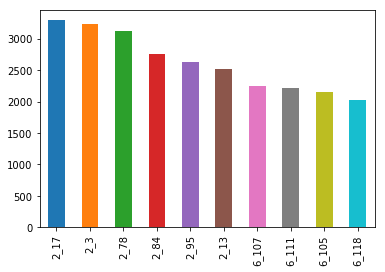

In [28]:
milestones_deduped["Hosp&Unit"].value_counts()[:10].plot(kind="bar")


#### Hospital 2 - unit 17 have  the most records

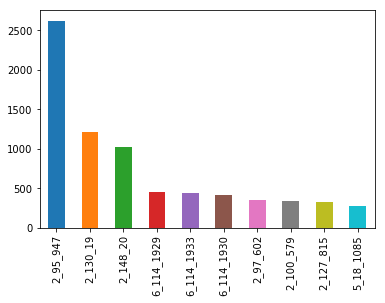

In [29]:
milestones_deduped["Hosp&Unit&Room"].value_counts()[:10].plot(kind="bar")


From previous graph we saw that hospital 2 unit 17 had most number of records. But from this graph we see that Hospital 2 - unint 95- room 947 has most number of records. This could mean that unit 17 has many rooms, hence patients get distributed.

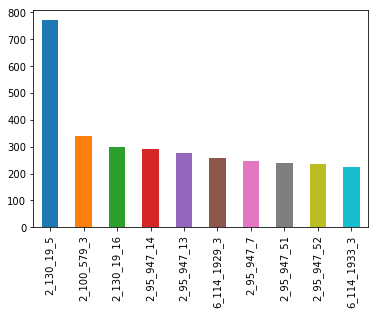

In [30]:
milestones_deduped["Hosp&Unit&Room&Bed"].value_counts()[:10].plot(kind="bar")


Hospital 2 -Unit 130 - Room 19 - Bed 5 has got the most number of patients. The previous graphs number may be because Hosp 2-Unit95-Room947 has many beds. But 2_130_19_5 bed is the most frequented one.

#### The following graphs shows the mean delay time (time between confirmed discharge and discharged time) according to the categories as before.

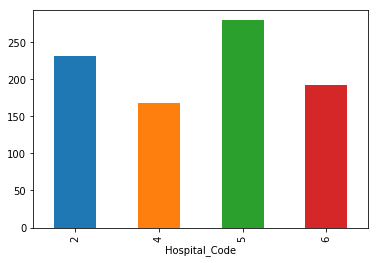

In [31]:
milestones_deduped.groupby('Hospital_Code').apply(lambda df:df['ConfDtoDisch(min)'].mean()).plot(kind='bar')

Even though hospital 2 had more number of visits, hospital 5 shows higher mean delay time.

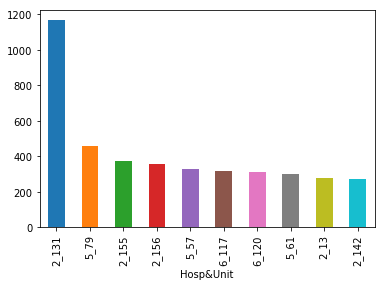

In [32]:
milestones_deduped.groupby('Hosp&Unit').apply(lambda df:df['ConfDtoDisch(min)'].mean()).sort_values(ascending = False)[:10].plot(kind='bar')

Hospital 2-Unit 131 shows the highest delay time. Some units of hospital 5 and 6 are also present in top 10.

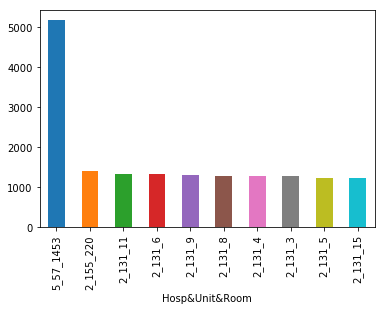

In [33]:
milestones_deduped.groupby('Hosp&Unit&Room').apply(lambda df:df['ConfDtoDisch(min)'].mean()).sort_values(ascending = False)[:10].plot(kind='bar')

Hospital5-Unit57-Room1453 shows maximum average delay (over 5000 min). Since we are averaging out the delays, values look different from previous graph. This suggests that Hospital2-Unit131 had more number of rooms/beds which levelled up the delay time.

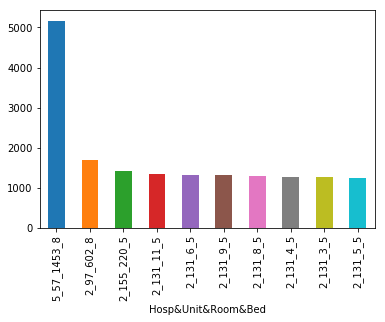

In [34]:
milestones_deduped.groupby('Hosp&Unit&Room&Bed').apply(lambda df:df['ConfDtoDisch(min)'].mean()).sort_values(ascending = False)[:10].plot(kind='bar')

Hospital 5-Unit 57-Room1453-Bed 8 gives maximum average delay.

In [125]:
#del milestones

## Req to Assign

In [3]:
req_to_assign = pd.read_excel("Req_CodedCore_DI.xlsx")

In [4]:
print("Column".ljust(18),"Type".ljust(16),"Unique Values".ljust(15), "Non-null".ljust(9), "Null Values".ljust(11),"Non-null %")
for i in req_to_assign.columns:
    print(i.ljust(18),str(req_to_assign[i].dtype).ljust(16),str(req_to_assign[i].nunique()).ljust(15),
          str(len(req_to_assign[req_to_assign[i].notnull()])).ljust(9), str(len(req_to_assign[req_to_assign[i].isnull()])).ljust(11), 
          round(len(req_to_assign[req_to_assign[i].notnull()])/len(req_to_assign[i])*100,2))


Column             Type             Unique Values   Non-null  Null Values Non-null %
RequestDateTime    datetime64[ns]   75057           82725     0           100.0
AssignedDateTime   object           70158           82725     0           100.0
RequesttoAssign    object           27508           74708     8017        90.31
VisitNumber_Code   int64            69151           82725     0           100.0
Room_Code          int64            1141            82725     0           100.0
Bed_Code           float64          36              81491     1234        98.51
OriginUnit_Code    int64            20              82725     0           100.0
AssignedUnit_Code  int64            96              82725     0           100.0
Hospital_Code      int64            4               82725     0           100.0


In [5]:
req_to_assign.head()

,RequestDateTime,AssignedDateTime,RequesttoAssign,VisitNumber_Code,Room_Code,Bed_Code,OriginUnit_Code,AssignedUnit_Code,Hospital_Code
0,2018-01-22 12:19:00,1/23/2018 12:15,86190 seconds,20156,426,5.0,127,17,2
1,2017-10-25 15:49:00,10/25/2017 4:19,1831 seconds,14288,151,16.0,98,3,2
2,2018-03-25 14:08:00,3/25/2018 3:03,3310 seconds,8389,2338,5.0,97,84,2
3,2018-01-31 07:01:00,1/31/2018 7:14,796 seconds,52073,429,5.0,140,17,2
4,2017-09-27 17:03:00,9/27/2017 7:14,7832 seconds,54792,421,5.0,98,17,2


In [6]:
columns_to_cat = ['Hospital_Code','Room_Code','Bed_Code','OriginUnit_Code','AssignedUnit_Code']
#req_to_assign[columns_to_cat].fillna(0).astype(int)
req_to_assign[columns_to_cat] = req_to_assign[columns_to_cat].astype('str')

In [7]:
req_to_assign['RequesttoAssign(sec)']= req_to_assign['RequesttoAssign'].str.replace(" seconds","")
req_to_assign['RequesttoAssign(sec)']= pd.to_numeric(req_to_assign['RequesttoAssign(sec)'].str.replace("0 days",""))

req_to_assign['RequesttoAssign(min)'] = req_to_assign['RequesttoAssign(sec)']/60
req_to_assign['RequesttoAssign(min)'].fillna(0, inplace=True)

In [10]:
req_to_assign["Hosp&OriginUnit"] = req_to_assign["Hospital_Code"].str.cat(req_to_assign["OriginUnit_Code"].astype(str), sep ="_")
req_to_assign["Hosp&AssignedUnit"] = req_to_assign["Hospital_Code"].str.cat(req_to_assign["AssignedUnit_Code"].astype(str), sep ="_")
req_to_assign["Hosp&AssignedUnit&Room"] = req_to_assign["Hosp&AssignedUnit"].str.cat(req_to_assign["Room_Code"].astype(str), sep ="_")
req_to_assign["Hosp&AssignedUnit&Room&Bed"] = req_to_assign["Hosp&AssignedUnit&Room"].str.cat(req_to_assign["Bed_Code"].astype(str), sep ="_")
req_to_assign.head()

,RequestDateTime,AssignedDateTime,RequesttoAssign,VisitNumber_Code,Room_Code,Bed_Code,OriginUnit_Code,AssignedUnit_Code,Hospital_Code,RequesttoAssign(sec),RequesttoAssign(min),Hosp&OriginUnit,Hosp&AssignedUnit,Hosp&AssignedUnit&Room,Hosp&AssignedUnit&Room&Bed
0,2018-01-22 12:19:00,1/23/2018 12:15,86190 seconds,20156,426,5.0,127,17,2,86190.0,1436.500000,2_127,2_17,2_17_426,2_17_426_5.0
1,2017-10-25 15:49:00,10/25/2017 4:19,1831 seconds,14288,151,16.0,98,3,2,1831.0,30.516667,2_98,2_3,2_3_151,2_3_151_16.0
2,2018-03-25 14:08:00,3/25/2018 3:03,3310 seconds,8389,2338,5.0,97,84,2,3310.0,55.166667,2_97,2_84,2_84_2338,2_84_2338_5.0
3,2018-01-31 07:01:00,1/31/2018 7:14,796 seconds,52073,429,5.0,140,17,2,796.0,13.266667,2_140,2_17,2_17_429,2_17_429_5.0
4,2017-09-27 17:03:00,9/27/2017 7:14,7832 seconds,54792,421,5.0,98,17,2,7832.0,130.533333,2_98,2_17,2_17_421,2_17_421_5.0


In [12]:
req_to_assign_deduped = req_to_assign.drop_duplicates(subset="VisitNumber_Code")
req_to_assign_deduped.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69151 entries, 0 to 82724
Data columns (total 15 columns):
RequestDateTime               69151 non-null datetime64[ns]
AssignedDateTime              69151 non-null object
RequesttoAssign               62525 non-null object
VisitNumber_Code              69151 non-null int64
Room_Code                     69151 non-null object
Bed_Code                      69151 non-null object
OriginUnit_Code               69151 non-null object
AssignedUnit_Code             69151 non-null object
Hospital_Code                 69151 non-null object
RequesttoAssign(sec)          36633 non-null float64
RequesttoAssign(min)          69151 non-null float64
Hosp&OriginUnit               69151 non-null object
Hosp&AssignedUnit             69151 non-null object
Hosp&AssignedUnit&Room        69151 non-null object
Hosp&AssignedUnit&Room&Bed    69151 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(11)
memory usage: 8.4+ MB


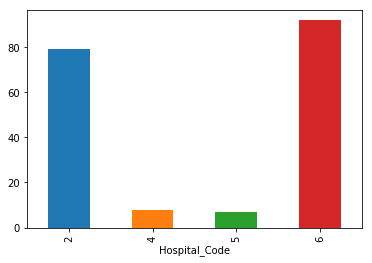

In [13]:
req_to_assign_deduped.groupby('Hospital_Code').apply(lambda df:df['RequesttoAssign(min)'].mean()).plot(kind='bar')

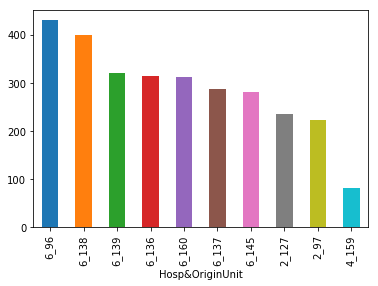

In [14]:
(req_to_assign_deduped.groupby('Hosp&OriginUnit')
    .apply(lambda df:df['RequesttoAssign(min)']
    .mean()).sort_values(ascending = False)[:10]
    .plot(kind='bar'))

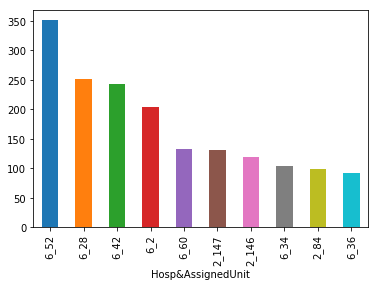

In [15]:
(req_to_assign_deduped.groupby('Hosp&AssignedUnit')
 .apply(lambda df:df['RequesttoAssign(min)']
        .mean()).sort_values(ascending = False)[:10]
 .plot(kind='bar'))

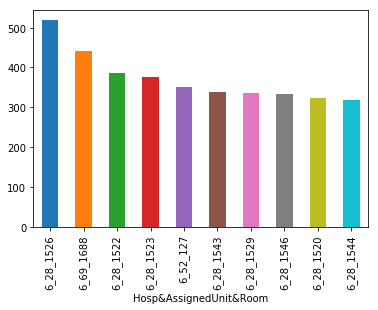

In [16]:
(req_to_assign_deduped.groupby('Hosp&AssignedUnit&Room')
 .apply(lambda df:df['RequesttoAssign(min)']
        .mean()).sort_values(ascending = False)[:10]
 .plot(kind='bar'))

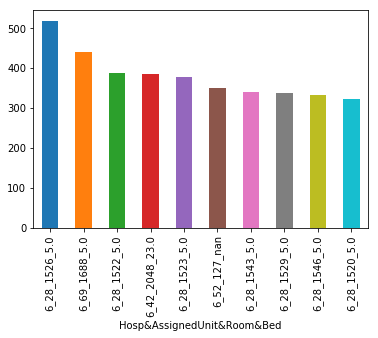

In [17]:
(req_to_assign_deduped.groupby('Hosp&AssignedUnit&Room&Bed')
 .apply(lambda df:df['RequesttoAssign(min)']
        .mean()).sort_values(ascending = False)[:10]
 .plot(kind='bar'))

## PARC

In [18]:
parc = pd.read_excel("PARC_CodedCore_DI.xlsx")

In [19]:
parc.head()

,TripDate,TripPriority,TripStatus,PickupZipcode,OtherDrop,DropoffZipCode,Accepted,CareLevel,ReceivedDateTime,RequestedDateTime,ScheduledDateTime,Unit_Code,TripID_Code,Agency_Code,Room_Code,Bed_Code,Hospital_Code
0,2018-06-10 13:00:00,Routine,Complete,15219,NaN,15317,NaN,BLS,2018-06-10 11:13:00,2018-06-10 13:00:00,2018-06-10 13:00:00,164,15201,31,479.0,4,2
1,2018-01-24 13:00:00,Routine,Complete,15219,NaN,16652,1 call,BLS,2018-01-23 16:09:00,2018-01-24 13:00:00,2018-01-24 13:59:00,75,7393,38,706.0,5,2
2,2018-04-05 12:29:00,Urgent,Complete,15219,NaN,15212,NaN,BLS,2018-04-05 12:16:00,2018-04-05 12:29:00,2018-04-05 14:30:00,163,11521,33,815.0,16,2
3,2018-04-03 10:59:00,Routine,Complete,15219,NaN,15650,1 call,BLS,2018-04-03 08:51:00,2018-04-03 10:59:00,2018-04-03 10:00:00,3,11360,10,206.0,5,2
4,2018-03-27 16:59:00,Routine,Complete,15219,NaN,15010,1 call,BLS,2018-03-27 11:17:00,2018-03-27 16:59:00,2018-03-27 16:59:00,3,11013,27,290.0,16,2


In [20]:
import datetime


In [21]:
print("Column".ljust(18),"Type".ljust(16),"Unique Values".ljust(15), "Non-null".ljust(9), "Null Values".ljust(11),"Non-null %")
for i in parc.columns:
    print(i.ljust(18),str(parc[i].dtype).ljust(16),str(parc[i].nunique()).ljust(15),
          str(len(parc[parc[i].notnull()])).ljust(9), str(len(parc[parc[i].isnull()])).ljust(11), 
          round(len(parc[parc[i].notnull()])/len(parc[i])*100,2))


Column             Type             Unique Values   Non-null  Null Values Non-null %
TripDate           datetime64[ns]   6507            18904     0           100.0
TripPriority       object           3               18904     0           100.0
TripStatus         object           2               18904     0           100.0
PickupZipcode      int64            3               18904     0           100.0
OtherDrop          object           745             7587      11317       40.13
DropoffZipCode     object           455             11355     7549        60.07
Accepted           object           1               9719      9185        51.41
CareLevel          object           5               18901     3           99.98
ReceivedDateTime   datetime64[ns]   17796           18904     0           100.0
RequestedDateTime  datetime64[ns]   6507            18904     0           100.0
ScheduledDateTime  datetime64[ns]   7489            18833     71          99.62
Unit_Code          int64           

In [22]:
parc = parc.dropna(subset=['ScheduledDateTime'])

In [23]:
diff = parc.ScheduledDateTime - parc.RequestedDateTime
parc['diffSchReq'] = diff.apply(lambda x:x.total_seconds())/60

In [24]:
parc

,TripDate,TripPriority,TripStatus,PickupZipcode,OtherDrop,DropoffZipCode,Accepted,CareLevel,ReceivedDateTime,RequestedDateTime,ScheduledDateTime,Unit_Code,TripID_Code,Agency_Code,Room_Code,Bed_Code,Hospital_Code,diffSchReq
0,2018-06-10 13:00:00,Routine,Complete,15219,NaN,15317,NaN,BLS,2018-06-10 11:13:00,2018-06-10 13:00:00,2018-06-10 13:00:00,164,15201,31,479.0,4,2,0.0
1,2018-01-24 13:00:00,Routine,Complete,15219,NaN,16652,1 call,BLS,2018-01-23 16:09:00,2018-01-24 13:00:00,2018-01-24 13:59:00,75,7393,38,706.0,5,2,59.0
2,2018-04-05 12:29:00,Urgent,Complete,15219,NaN,15212,NaN,BLS,2018-04-05 12:16:00,2018-04-05 12:29:00,2018-04-05 14:30:00,163,11521,33,815.0,16,2,121.0
3,2018-04-03 10:59:00,Routine,Complete,15219,NaN,15650,1 call,BLS,2018-04-03 08:51:00,2018-04-03 10:59:00,2018-04-03 10:00:00,3,11360,10,206.0,5,2,-59.0
4,2018-03-27 16:59:00,Routine,Complete,15219,NaN,15010,1 call,BLS,2018-03-27 11:17:00,2018-03-27 16:59:00,2018-03-27 16:59:00,3,11013,27,290.0,16,2,0.0
5,2017-09-18 18:00:00,Routine,Complete,15219,NaN,16121,NaN,Wheelchair Van,2017-09-18 15:24:00,2017-09-18 18:00:00,2017-09-18 18:29:00,13,184,12,255.0,5,2,29.0
6,2018-08-13 16:00:00,Routine,Complete,15219,NaN,15232,1 call,BLS,2018-08-13 10:03:00,2018-08-13 16:00:00,2018-08-13 16:00:00,3,18724,31,397.0,16,2,0.0
7,2017-12-08 16:00:00,Routine,Complete,15219,NaN,15235,NaN,BLS,2017-12-08 11:50:00,2017-12-08 16:00:00,2017-12-08 16:30:00,78,4798,7,37.0,5,2,30.0
8,2018-05-31 14:30:00,Routine,Complete,15219,NaN,16101,1 call,Wheelchair Van,2018-05-31 11:42:00,2018-05-31 14:30:00,2018-05-31 15:00:00,84,14637,26,2314.0,5,2,30.0
9,2017-10-25 16:59:00,Urgent,Complete,15219,NaN,15226,NaN,BLS,2017-10-25 16:47:00,2017-10-25 16:59:00,2017-10-25 21:00:00,98,2354,31,132.0,4,2,241.0


In [25]:
columns_to_cat = ['Hospital_Code','Room_Code','Bed_Code','Agency_Code','Unit_Code']
parc[columns_to_cat] = parc[columns_to_cat].astype('str')

In [26]:
parc["Hosp&Unit"] = parc["Hospital_Code"].str.cat(parc["Unit_Code"].astype(str), sep ="_")
parc["Hosp&Unit&Room"] = parc["Hosp&Unit"].str.cat(parc["Room_Code"].astype(str), sep ="_")
parc["Hosp&Unit&Room&Bed"] = parc["Hosp&Unit&Room"].str.cat(parc["Bed_Code"].astype(str), sep ="_")
parc["Hosp&Agency"] = parc["Hospital_Code"].str.cat(parc["Agency_Code"].astype(str), sep ="_")
parc["Hosp&Unit&Agency"] = parc["Hosp&Unit"].str.cat(parc["Agency_Code"].astype(str), sep ="_")
parc.head()

,TripDate,TripPriority,TripStatus,PickupZipcode,OtherDrop,DropoffZipCode,Accepted,CareLevel,ReceivedDateTime,RequestedDateTime,...,Agency_Code,Room_Code,Bed_Code,Hospital_Code,diffSchReq,Hosp&Unit,Hosp&Unit&Room,Hosp&Unit&Room&Bed,Hosp&Agency,Hosp&Unit&Agency
0,2018-06-10 13:00:00,Routine,Complete,15219,NaN,15317,NaN,BLS,2018-06-10 11:13:00,2018-06-10 13:00:00,...,31,479.0,4,2,0.0,2_164,2_164_479.0,2_164_479.0_4,2_31,2_164_31
1,2018-01-24 13:00:00,Routine,Complete,15219,NaN,16652,1 call,BLS,2018-01-23 16:09:00,2018-01-24 13:00:00,...,38,706.0,5,2,59.0,2_75,2_75_706.0,2_75_706.0_5,2_38,2_75_38
2,2018-04-05 12:29:00,Urgent,Complete,15219,NaN,15212,NaN,BLS,2018-04-05 12:16:00,2018-04-05 12:29:00,...,33,815.0,16,2,121.0,2_163,2_163_815.0,2_163_815.0_16,2_33,2_163_33
3,2018-04-03 10:59:00,Routine,Complete,15219,NaN,15650,1 call,BLS,2018-04-03 08:51:00,2018-04-03 10:59:00,...,10,206.0,5,2,-59.0,2_3,2_3_206.0,2_3_206.0_5,2_10,2_3_10
4,2018-03-27 16:59:00,Routine,Complete,15219,NaN,15010,1 call,BLS,2018-03-27 11:17:00,2018-03-27 16:59:00,...,27,290.0,16,2,0.0,2_3,2_3_290.0,2_3_290.0_16,2_27,2_3_27


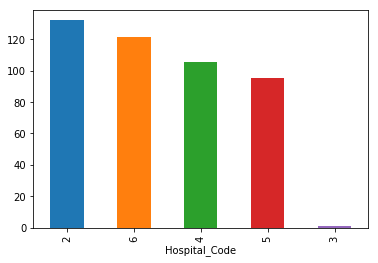

In [27]:
(parc.groupby('Hospital_Code')
 .apply(lambda df:df['diffSchReq']
        .mean()).sort_values(ascending = False)[:10]
 .plot(kind='bar'))

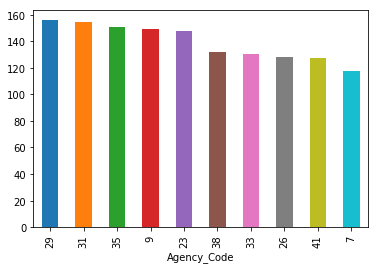

In [28]:
(parc.groupby('Agency_Code')
 .apply(lambda df:df['diffSchReq']
        .mean()).sort_values(ascending = False)[:10]
 .plot(kind='bar'))

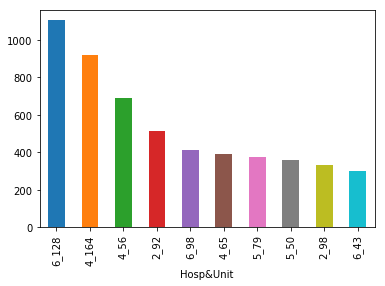

In [29]:
(parc.groupby('Hosp&Unit')
 .apply(lambda df:df['diffSchReq']
        .mean()).sort_values(ascending = False)[:10]
 .plot(kind='bar'))

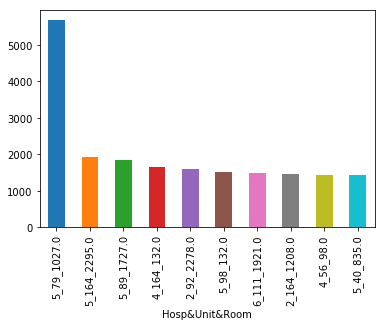

In [30]:
(parc.groupby('Hosp&Unit&Room')
 .apply(lambda df:df['diffSchReq']
        .mean()).sort_values(ascending = False)[:10]
 .plot(kind='bar'))

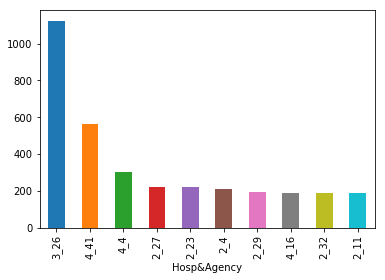

In [31]:
(parc.groupby('Hosp&Agency')
 .apply(lambda df:df['diffSchReq']
        .mean()).sort_values(ascending = False)[:10]
 .plot(kind='bar'))

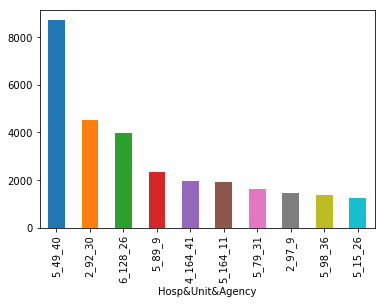

In [32]:
(parc.groupby('Hosp&Unit&Agency')
 .apply(lambda df:df['diffSchReq']
        .mean()).sort_values(ascending = False)[:10]
 .plot(kind='bar'))